### IDs:
Insert yours IDs to the cell below

ID #1:329827190

ID #2:204818181


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
from scipy import stats 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
from itertools import product

%matplotlib inline

### Question 1 - Defective products

In a manufacturing pipeline products are 1% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 75% probability of having at least one defective product in the batch sent?
Write a function that computes this.

***Answer:***

In [2]:
# Notice that this is a Binomial distribution where p = 0.01. 
# We will find the number of samples required by finding the probability by increasing n
# until we get the desired probability

def find_n_bin(prob_req, p, k):
    n = 0
    while True:
        Y = stats.binom(n,p)
        res = 0
        for i in range (0,k+1):
            res += Y.pmf(i)
        prob = 1 - res
        if prob > prob_req:
            return ("Num Trials Required: {}".format(n))
        n += 1
        

print(find_n_bin(0.75, 0.01, 0))

Num Trials Required: 138


#### Answer the same question but where:
#### 1.B.1 
Products are 4% defective and we want a 95% probability of at least one defective product in the batch

***Answer:***

In [3]:
# Using the same function defined above, simply modifing the input arguments to fit the given problem

print(find_n_bin(0.95, 0.04, 0))

Num Trials Required: 74


#### 1.B.2
Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch

***Answer:***

In [4]:
# Using the original find_n that was constructed

print(find_n_bin(0.9, 0.1, 4))

Num Trials Required: 78


#### 1.B.3
Products are 20% defective and we want a 90% probability of at least 10 defective products in the batch

***Answer:***

In [5]:
# Using the same function as above with different values

print(find_n_bin(0.9, 0.2, 9))

Num Trials Required: 69


#### 1.C
Can you comment on the difference between the answer 1.B.2 and that of 1.B.3?

***Answer:***

The difference between the answers is counter intuitive:
In general, we expect to need more trials to observe more defects. We might even expect the number of trials to be
the some once we notice that we have twice the probability of defect, and half the number of desired defects.
However, neither were the case: 78 trials for at least 5 defects, and 69 trials for twice as many (10) defects.



### Question 2 - Formula

#### 2.A
Prove (you can use what you learned in class. In particular - linearity of variance for independent random variables):

$$g(n,p) = \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} = np\big(1+p(n-1)\big)$$

***Answer:***

Note that the given equation $$g(n,p) = \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} = (E[X^2])$$

Also recall from class that: $$V[X] = E[X^2] - (E[X])^2$$
and that $$V[X] = np(1-p)$$
and that $$E[X] = np$$
and so, $$(E[X])^2 = (np)^2$$

So we have 

1. $E[X^2] =  V[X] + (E[X])^2$  
2.  $= np(1-p) + (np)^2$  
3.  $= np((1-p)+(np)) $  
4.  $= np(1 - p + np) $  
5.  $= np(1 + np - p) $  
6.  $= np(1 + p(n - 1)) $


#### 2.B
Use this formula to compute  (n = 5000, p = 0.1, 0.2, 0.3). What is the complexity of this calculation, in terms of n?

***Answer:***

In [6]:
prob_list = [0.1,0.2,0.3]
for p in prob_list:
    res = 5000*p*(1+p*(5000-1))
    print (' p = {} : {} '.format(p,int(res)))


 p = 0.1 : 250450 
 p = 0.2 : 1000800 
 p = 0.3 : 2251050 


As $n$ is a constant in this computation, we compute the complexity as $O(5000) \in O(1)$

#### 2.C
Consider the function:
$$f(n,p) = \sum_{k=0}^{n} {n \choose k} k^3 p^k (1-p)^{(n-k)}$$

Describe how $f(n,p)$ can be computed using a process that requires a constant number of multiplications and additions, regardless of n.
Use your process to compute the values of $f(n=10000, p=0.05, 0.1, 0.2, 0.3)$ in O(1).<br>
Explain all your steps. 
 

***Answer:***

Note that that $f(n,p)$ is the third raw moment for $X$ ~ $Bin(n,p)$

The raw moment is formally defined as $\mu_{3}^{'} = \int_{-\infty}^{+\infty} x^{3} f(x)dx $ and the central moment is formally defined as $\mu_{3} = \int_{-\infty}^{+\infty} (x-\mu)^{3} f(x) dx$ 

Recall that in lecture 4, we saw that the cental third moment of a random variable $X$ where $X~Bin(n,p)$ equals $np(1-p)(1-2p)$

By the formal definition 
$$np(1-p)(1-2p) = \mathbf{E}((X-\mu_{x})^{3})$$
as $\mathbf{E}(\mu_{x}) = np$, 
$$ = \mathbf{E}((X-np)^{3})$$
$$ = \mathbf{E}(X^{3} - 3X^{2}(np)+3X(np)^{2} - (np)^{3}) $$
$$ = \mathbf{E}(X^{3}) - \mathbf{E}(3X^{2}(np)) + \mathbf{E}(3X(np)^{2}) - \mathbf{E}(np)^{3}) $$
$$ = \mathbf{E}(X^{3}) - 3(np)\mathbf{E}(X^{2}) + 3(np)^{2}\mathbf{E}(X) - (np)^{3} $$
So we get that
$$np(1-p)(1-2p) = \mathbf{E}(X^{3}) - 3(np)\mathbf{E}(X^{2}) + 3(np)^{2}\mathbf{E}(X) - (np)^{3} $$
$$- \mathbf{E}(X^{3}) = -np(1-p)(1-2p) - 3(np)\mathbf{E}(X^{2}) + 3(np)^{2}\mathbf{E}(X) - (np)^{3} $$
$$ \mathbf{E}(X^{3}) = np(1-p)(1-2p) + 3(np)\mathbf{E}(X^{2}) - 3(np)^{2}\mathbf{E}(X) + (np)^{3} $$
As $ \mathbf{E}(X^{1}) = np $ and $ \mathbf{E}(X^{2}) = np(1+p(n-1)) $
$$ \mathbf{E}(X^{3}) = np(1-p)(1-2p) + 3(np)(np(1+p(n-1))) - 3(np)^{2}(np) + (np)^{3} $$
$$ \mathbf{E}(X^{3}) = np(1-p)(1-2p) + 3(np)(np(1+p(n-1))) - 3(np)^{3} + (np)^{3} $$
$$ \mathbf{E}(X^{3}) = np(1-p)(1-2p) + 3(np)(np(1+p(n-1))) - 2(np)^{3}$$
$$ \mathbf{E}(X^{3}) = (np - np^{2})(1-2p) + 3(n^{2}p^{2}(1+p(n-1))) - 2(np)^{3}$$
$$ \mathbf{E}(X^{3}) = (np - np^{2})(1-2p) + 3(n^{2}p^{2}+n^{2}p^{3}(n-1)) - 2(np)^{3}$$
$$ \mathbf{E}(X^{3}) = (np - np^{2})(1-2p) + 3(n^{2}p^{2}+n^{3}p^{3}-n^{2}p^{3}) - 2(np)^{3}$$
$$ \mathbf{E}(X^{3}) = np - 2np^{2} - np^{2} + 2np^{3} + 3(n^{2}p^{2}+n^{3}p^{3}-n^{2}p^{3}) - 2(np)^{3}$$
$$ \mathbf{E}(X^{3}) = np - 2np^{2} - np^{2} + 2np^{3} + 3n^{2}p^{2}+3n^{3}p^{3}-3n^{2}p^{3} - 2(np)^{3}$$
$$ \mathbf{E}(X^{3}) = np - 3np^{2} + 2np^{3} + 3n^{2}p^{2} + n^{3}p^{3} - 3n^{2}p^{3}$$
$$ \mathbf{E}(X^{3}) = np +3n^{2}p^{2} - 3np^{2} + 2np^{3} + n^{3}p^{3} - 3n^{2}p^{3}$$
$$ \mathbf{E}(X^{3}) = np +3p^{2}(n^{2} - n) + 2np^{3} + n^{3}p^{3} - 3n^{2}p^{3}$$
$$ \mathbf{E}(X^{3}) = np +3p^{2}(n(n - 1)) + 2np^{3} + n^{3}p^{3} - 3n^{2}p^{3}$$
$$ \mathbf{E}(X^{3}) = np +3p^{2}(n(n - 1)) + n^{3}p^{3} - 3n^{2}p^{3}+ 2np^{3} $$
$$ \mathbf{E}(X^{3}) = np +3p^{2}(n(n - 1)) + n^{3}p^{3} - 2n^{2}p^{3} - n^{2}p^{3} + 2np^{3} $$
$$ \mathbf{E}(X^{3}) = np +3p^{2}(n(n - 1)) + np^{3}(n^{2} - 2n - n + 2) $$
$$ \mathbf{E}(X^{3}) = np +3p^{2}(n(n - 1)) + np^{3}((n-1)(n-2)) $$

<center>Overall, this calculation runs in $O(1)$ for a constant $n$</center>

In [7]:
prob_list = [0.05,0.1,0.2,0.3]
n = 10000
for p in prob_list:
    res = n*p + 3*(p**2)*(n*(n-1)) + n*(p**3)*((n-1)*(n-2))
    print (' p = {} : {} '.format(p,int(res)))
    


 p = 0.05 : 125712927 
 p = 0.1 : 1002700720 
 p = 0.2 : 8009600960 
 p = 0.3 : 27018900839 


### Question 3 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 
The population of SH and RG is 12K and 18K respectively. <br>
Here are some findings of the survey:
* The mean rent in SH and RG is 5100RCU and 3700RCU respectively.
* The median rent is 4000RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 3.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

***Answer:***

SH - Mean: 5100, Median: 4000 , IQR: 3100
RG - Mean: 3700, Median: 4000 , IQR: 5360
Fits IQR requirements


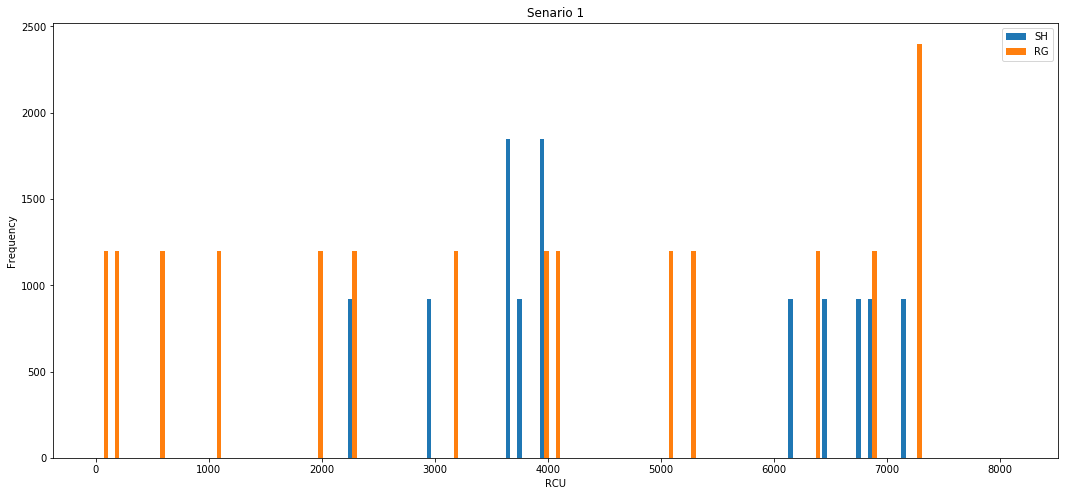

In [23]:
# Setting up SH

# We use seed so we dont change the set of randomized numbers
np.random.seed(101)

sh_pop = 12000
s_t=np.array([4000, 3800, 6900, 3700, 6500, 3700, 6800, 3990, 6210, 3000, 7200, 2300, 8200] * int(sh_pop/13))

print('SH - Mean: {}, Median: {} , IQR: {}'.format(int(np.mean(s_t)), int(np.median(s_t)), int(stats.iqr(s_t))))

# Setting up RG
np.random.seed(101)

rg_pop = 18000
s_2t =np.array([4000, 20, 7300, 120, 7280, 520, 6880, 1020, 6380, 2000, 5300, 2300, 5100, 3200, 4080] * int(rg_pop/15))

print('RG - Mean: {}, Median: {} , IQR: {}'.format(int(np.mean(s_2t)), int(np.median(s_2t)), int(stats.iqr(s_2t))))

if (stats.iqr(s_t) < stats.iqr(s_2t)):
    print ('Fits IQR requirements')
    
figure, ax = plt.subplots(figsize = (18,8))
ax.hist([s_t,s_2t], bins = np.arange(min(min(s_t),min(s_2t)), max(max(s_t), max(s_2t)), 100), label=['SH','RG'])
plt.title('Scenario 1')
plt.xlabel('RCU')
plt.ylabel('Frequency')
plt.legend()

SH s_t - Mean: 5100, Median: 4000 , IQR: 3700
GH s_t - Mean: 3700, Median: 4000 , IQR: 6700
Fits IQR requirements


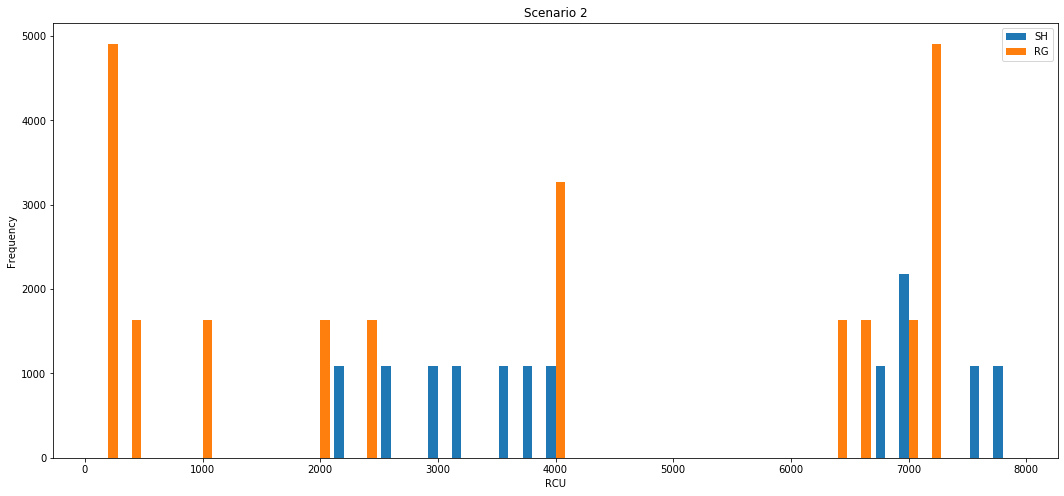

In [24]:
# Scenario 2
# Setting up SH
# We use seed so we dont change the set of randomized numbers
np.random.seed(102)

sh_pop = 12000
# newly added terms
s_t=np.array([2500, 3000, 3500, 3250, 3750, 4000, 7900, 7500, 6800, 6950, 6950, 2200, 8000] * int(sh_pop/13))
print('SH s_t - Mean: {}, Median: {} , IQR: {}'.format(int(np.mean(s_t)), int(np.median(s_t)), int(stats.iqr(s_t))))

# Setting up RG
np.random.seed(102)

rg_pop = 18000
# newly added terms
s_1t = np.array([200, 7000, 100, 7200, 200, 7200, 300, 7100, 1000, 6400, 4000 , 2000, 4000, 2300, 6500]* int(rg_pop/15))
print('GH s_t - Mean: {}, Median: {} , IQR: {}'.format(int(np.mean(s_1t)), int(np.median(s_1t)), int(stats.iqr(s_1t))))

if (stats.iqr(s_t) < stats.iqr(s_1t)):
    print ('Fits IQR requirements')
    
figure, ax = plt.subplots(figsize = (18,8))
ax.hist([s_t,s_1t], bins = np.arange(min(min(s_t),min(s_1t)), max(max(s_t), max(s_1t)), 200), label=['SH','RG'])
plt.title('Scenario 2')
plt.xlabel('RCU')
plt.ylabel('Frequency')
plt.legend()

#### 3.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG 

***Answer:***

SH s_t - Mean: 5100, Median: 4000 , IQR: 4500, Var: 11614438
GH s_t - Mean: 3700, Median: 4000 , IQR: 6900, Var: 10058181
Fits IQR and Var requirements


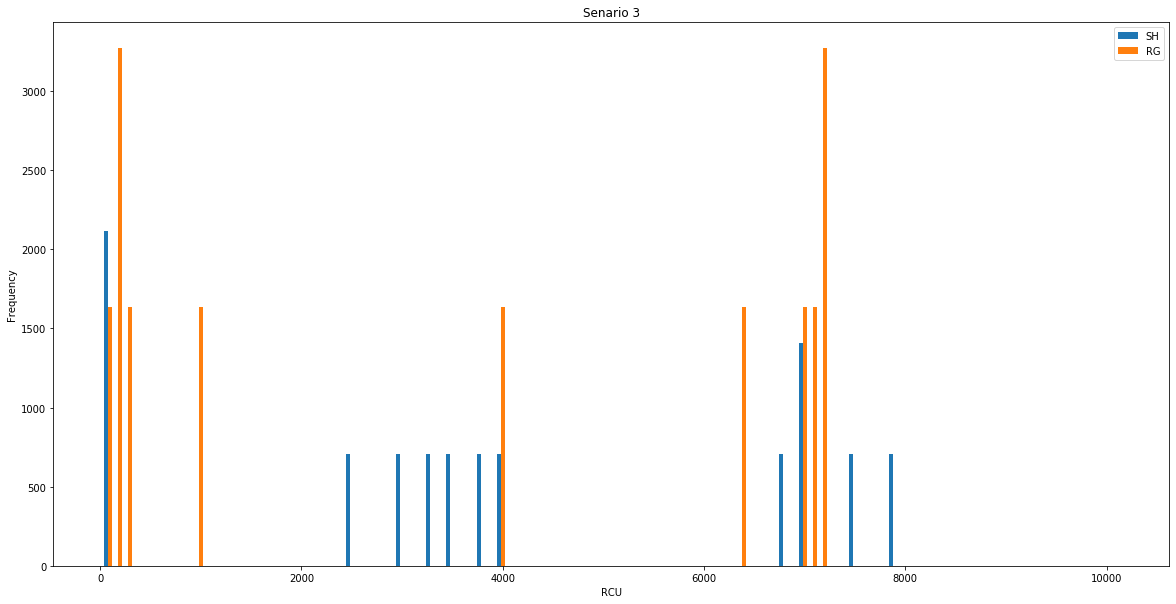

In [25]:
# Setting up SH
# We use seed so we dont change the set of randomized numbers
np.random.seed(102)

sh_pop = 12000
# newly added terms
s_t=np.array([40, 10160, 35, 10165, 30, 10170, 2500,3000,3500, 3250, 3750, 4000, 7900, 7500, 6800, 6950, 6950] * int(sh_pop/17))
print('SH s_t - Mean: {}, Median: {} , IQR: {}, Var: {}'.format(int(np.mean(s_t)), int(np.median(s_t)), int(stats.iqr(s_t)), int(np.var(s_t))))

# Setting up RG
np.random.seed(102)

mu, sigma, pop = 4000, 100, 18000
# newly added terms
s_1t = np.array([ 200, 7000, 100, 7200, 200, 7200, 300, 7100, 1000, 6400, 4000]* int(pop/11))
print('GH s_t - Mean: {}, Median: {} , IQR: {}, Var: {}'.format(int(np.mean(s_1t)), int(np.median(s_1t)), int(stats.iqr(s_1t)), int(np.var(s_1t))))

if ((stats.iqr(s_t) < stats.iqr(s_1t)) and (np.var(s_t) > np.var(s_1t))):
    print ('Fits IQR and Var requirements')

figure, ax = plt.subplots(figsize = (20,10))
ax.hist([s_t,s_1t], bins = np.arange(min(min(s_t),min(s_1t)), max(max(s_t), max(s_1t)), 100), label=['SH','RG'])
plt.title('Senario 3')
plt.xlabel('RCU')
plt.ylabel('Frequency')
plt.legend()

The survey also examined the per household income (PHI) in these two places.<br>
It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500
* The median is 12000 in SH and 8000 in RG
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 3.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

***Answer:***

In [100]:
# SH requirements
required_phi_mean_sh = 12500
required_phi_median_sh = 12000
required_phi_alpha_sh = 0.97

# Producing data for income
phi_sh = np.array([8500, 9000, 9500, 10000, 10500, 11000, 12000, 12000, 12000, 12000, 13500, 13500, 16500, 18000, 19500] * int(sh_pop/15))
phi_sh_median = np.median(phi_sh)
phi_sh_mean = np.mean(phi_sh)

print ('required_phi_mean_sh {}. phi_sh_mean {}'.format(required_phi_mean_sh, phi_sh_mean))
print ('required_phi_median_sh {}. phi_sh_median {}'.format(required_phi_median_sh, phi_sh_median))

# Producing data for rent
# we want mean = 5100
# we want median = 4000
rent_sh = np.array([2100, 3100, 3700, 3700, 4000, 4000, 4000, 4000, 4000, 5000, 6200, 6300, 7600, 8300, 10500] * int(sh_pop/15))
rent_sh_median = np.median(rent_sh)
rent_sh_mean = np.mean(rent_sh)

print ('rent_sh_median {0:.2f}'.format(rent_sh_median))
print ('rent_sh_mean {0:.2f}'.format(rent_sh_mean))

#calculating the cov using the rent data and the income data
sh_cov = np.cov(rent_sh, phi_sh)[0,1]

compare_sh_cov = required_phi_alpha_sh * ((np.sqrt(np.var((rent_sh)))) * (np.sqrt(np.var((phi_sh)))))

print('ours {0:.2f},compare_sh_cov {1:.2f} '.format(sh_cov,compare_sh_cov))
print('diff for sh is {0:.2f}%'.format(np.abs((sh_cov - compare_sh_cov)/sh_cov * 100)))

print('='*80)

# RG requirements
required_phi_mean_rg = 8500
required_phi_median_rg = 8000
required_phi_alpha_rg = 0.89

# Producing data for income
phi_rg = np.array([6000, 6500, 7000, 7500, 8000, 8000 ,8000, 9000, 9500, 11000, 13000] * int(rg_pop/11))
phi_rg_median = np.median(phi_rg)
phi_rg_mean = np.mean(phi_rg)

print ('required_phi_mean_rg {}. phi_rg_mean {}'.format(required_phi_mean_rg, phi_rg_mean))
print ('required_phi_median_rg {}. phi_rg_median {}'.format(required_phi_median_rg, phi_rg_median))

# Producing data for rent
# we want mean = 3700
# we want median = 4000
rent_rg = np.array([2000, 1500, 2500, 3400, 3500, 4000, 4000, 4500, 4800, 5000, 5500]* int(rg_pop/11))
rent_rg_median = np.median(rent_rg)
rent_rg_mean = np.mean(rent_rg)

print ('rent_rg_median {0:.2f}'.format(rent_rg_median))
print ('rent_rg_mean {0:.2f}'.format(rent_rg_mean))

#calculating the cov using the rent data and the income data
rg_cov = np.cov(rent_rg, phi_rg)[0,1]

compare_rg_cov = required_phi_alpha_rg * ((np.sqrt(np.var((rent_rg)))) * (np.sqrt(np.var((phi_rg)))))

print('ours {0:.2f},compare_rg_cov {1:.2f} '.format(rg_cov,compare_rg_cov))
print('diff for rg is {0:.2f}%'.format(np.abs((rg_cov - compare_rg_cov)/rg_cov * 100)))

required_phi_mean_sh 12500. phi_sh_mean 12500.0
required_phi_median_sh 12000. phi_sh_median 12000.0
rent_sh_median 4000.00
rent_sh_mean 5100.00
ours 6663888.66,compare_sh_cov 6641943.52 
diff for sh is 0.33%
required_phi_mean_rg 8500. phi_rg_mean 8500.0
required_phi_median_rg 8000. phi_rg_median 8000.0
rent_rg_median 4000.00
rent_rg_mean 3700.00
ours 2127390.94,compare_rg_cov 2114376.08 
diff for rg is 0.61%


#### 3.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selcted bining resolution.

***Answer:***

In [102]:
# #rewrite

# sh_df_combinations = pd.DataFrame(product(sh_rent, sh_phi), columns=['rent', 'phi'])
# sh_rent_bin_width = 500
# sh_phi_bin_width = 1000
# sh_rent_bins = np.arange(0, max(sh_df_combinations['rent']) + sh_rent_bin_width, sh_rent_bin_width)
# sh_phi_bins = np.arange(0, max(sh_df_combinations['phi']) + sh_phi_bin_width, sh_phi_bin_width)
# plt.figure(figsize=(8,8))
# plt.hist2d(sh_df_combinations['rent'], sh_df_combinations['phi'], bins=[sh_rent_bins, sh_phi_bins])
# plt.colorbar()
# plt.title("SH Heatmap", fontsize=30)
# plt.xlabel("Rent", fontsize=20)
# plt.ylabel("PHI", fontsize=20)

# rg_df_combinations = pd.DataFrame(product(rg_rent, rg_phi), columns=['rent', 'phi'])
# rg_rent_bin_width = 500
# rg_phi_bin_width = 1000
# rg_rent_bins = np.arange(0, max(rg_df_combinations['rent']) + rg_rent_bin_width, rg_rent_bin_width)
# rg_phi_bins = np.arange(0, max(rg_df_combinations['phi']) + rg_phi_bin_width, rg_phi_bin_width)
# plt.figure(figsize=(8,8))
# plt.hist2d(rg_df_combinations['rent'], rg_df_combinations['phi'], bins=[rg_rent_bins, rg_phi_bins])
# plt.colorbar()
# plt.title("RG Heatmap", fontsize=30)
# plt.xlabel("Rent", fontsize=20)
# plt.ylabel("PHI", fontsize=20)

### Question 4 - Covariance and independence

#### 4.A
Define two random variables X and Y over the same probability space so that<br>
* E(X) = the sum of digits of the date you were born on (sum of all in DD/MM/YYYY)
* E(Y) = the sum of the two last digits of your id number

And so that X and Y are:
* NOT correlated (Cov(X,Y) = 0) and NOT independent.

***Answer:***

In [101]:
#rewrite

# Birthday = 04/01/1994
# ID = 204818181
bday_digits = 4 + 1+ 1+ 9+ 4 
id_digits = 8 + 1




# ###




# # random variable z
# z = np.array([-1, 0, 1])
# p_z = np.array([1/3, 1/3, 1/3])
# e_z = np.sum(np.multiply(z, p_z))
# e_z_sq = np.sum(np.multiply(z**2, p_z))

# # random variables X and Y defined over the same probability space
# x = z + (sum_bday_digits - e_z)  # z + 38
# y = z**2 + (sum_last_two_id - e_z_sq)  # = z**2 + 25/3

# # expectations of X and Y
# e_x = np.sum(np.multiply(x, p_z))
# e_y = np.sum(np.multiply(y, p_z))
# print("E(X) =", e_x)
# print("E(Y) =", e_y)

# # calculate covariance
# cov_x_y = np.cov(x,y)[0, 1]
# print("Cov(X,Y) =", cov_x_y)



In [ ]:
# Next we will show X and Y are not independent:<br><br>
# P(X=38) = P(Z+38=38) = P(Z=0) = 1/3<br>
# P(X=38 | Y=25/3) = P(Z+38=38 | Z**2 + 25/3 = 25/3) = P(Z=0 | Z=0) = 1<br>
# ==> P(X=38) != P(X=38 | Y=25/3) ==> X and Y are dependent

#### 4.B
Can you define random variables that are independent and so that Cov(X,Y) > 0?<br>
Explain.


***Answer:***

In [ ]:
# #rewrite

# No, because the covariance for two independent random variables is zero

# $ 
# \\ Cov(X,Y) = E[(X-\mu_x)(Y-\mu_y)] = 
# \\ = E[XY - X\mu_y - Y\mu_x + \mu_x\mu_y] = 
# \\ = E[XY] - E[X\mu_y] - E[Y\mu_x] + E[\mu_x\mu_y] = 
# \\ = E[XY] - \mu_yE[X] - \mu_xE[Y] + \mu_x\mu_y = 
# \\ = E[XY] - \mu_y\mu_x - \mu_x\mu_y + \mu_x\mu_y = 
# \\ = E[XY] - \mu_y\mu_x = [ \text{for independent variables: } E[XY] = E[X]E[Y] = \mu_x\mu_y]
# \\ \mu_y\mu_x - \mu_y\mu_x = 0
# $

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

***Answer:***

In [26]:
# We assume that the input of the distribution is given in a form of a dictionary P where, P['dis_V'] holds
# distribution values and where P['dis_P'] holds the probability of each value

def NFoldConv(P, n):
    # Obtaining all values and probabilities out of the given distribution and repeating these values n times, essentially, cross product
    values = np.array(list(product(P["dis_V"], repeat = n)))
    probabilities = np.array(list(product(P["dis_P"], repeat = n)))
   
    # Obtaining all possible values and all possible probabilities for Q. i.e. all possible sums of values for summing n elements
    valus_sum = values.sum(axis=1)
    probabilities_product = np.product(probabilities, axis=1)
    
    # We must constructe a dataframe and define the columnns
    results = list(zip(valus_sum,probabilities_product))
    results_df = pd.DataFrame(results, columns=['Q_Values', "Q_Probabilities"])
    
    # We sum the probabilities of all instances per sum value
    Q = results_df.groupby("Q_Values")["Q_Probabilities"].sum()
    return Q

#### 5.B
Compute the distribution of the sum of the results of rolling a fair dice 8 times

***Answer:***

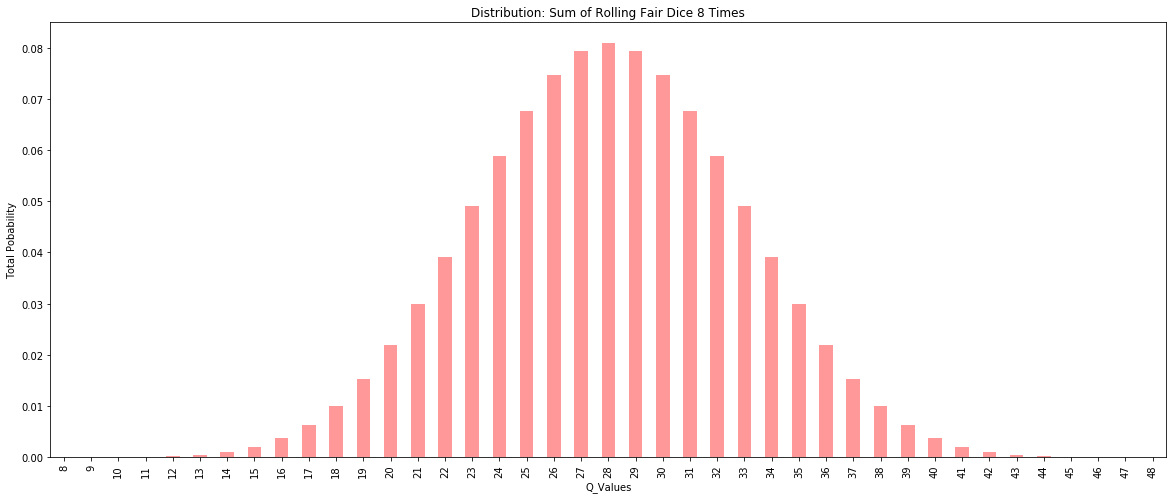

In [27]:
#Consider the following distribution of a fair dice
P = {
    "dis_V": [1 , 2, 3, 4, 5, 6],
    "dis_P": [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
    }

Q = NFoldConv(P,8)

plt.title('Distribution: Sum of Rolling Fair Dice 8 Times')
plt.xlabel('Sum')
plt.ylabel('Total Pobability')
Q.plot.bar(figsize = (20,8), color = 'red', alpha = 0.4)
plt.show()

#### 5.C
Assume that the price of a stock changes in any given day according to (in NIS):
$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.2 & 0.25 & 0.35 & 0.05 & 0.15
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

***Answer:***

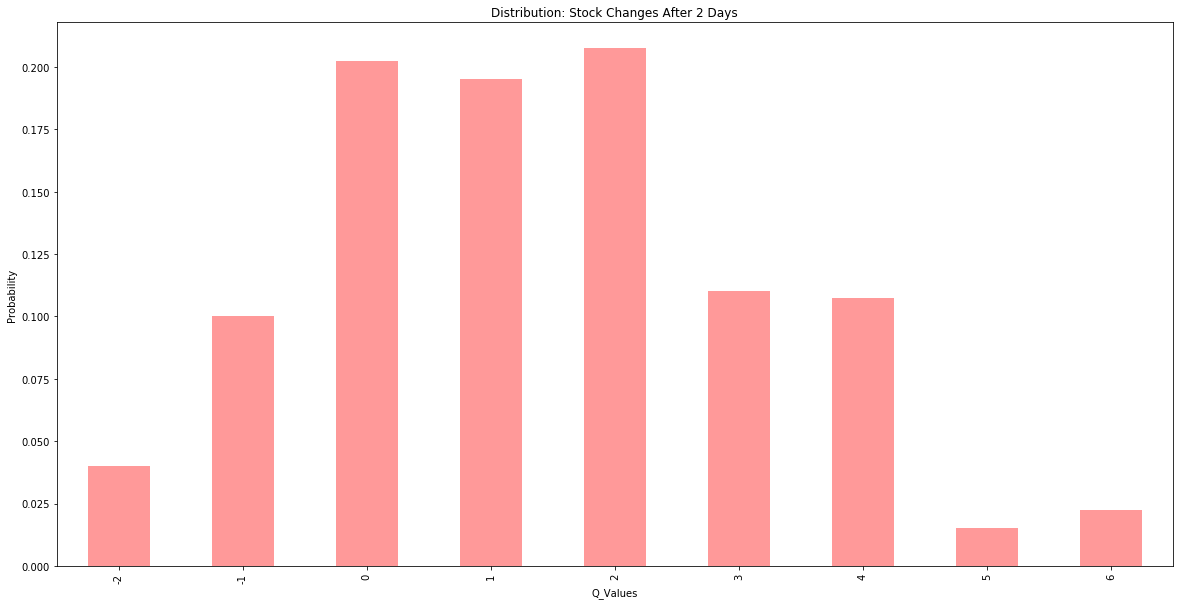

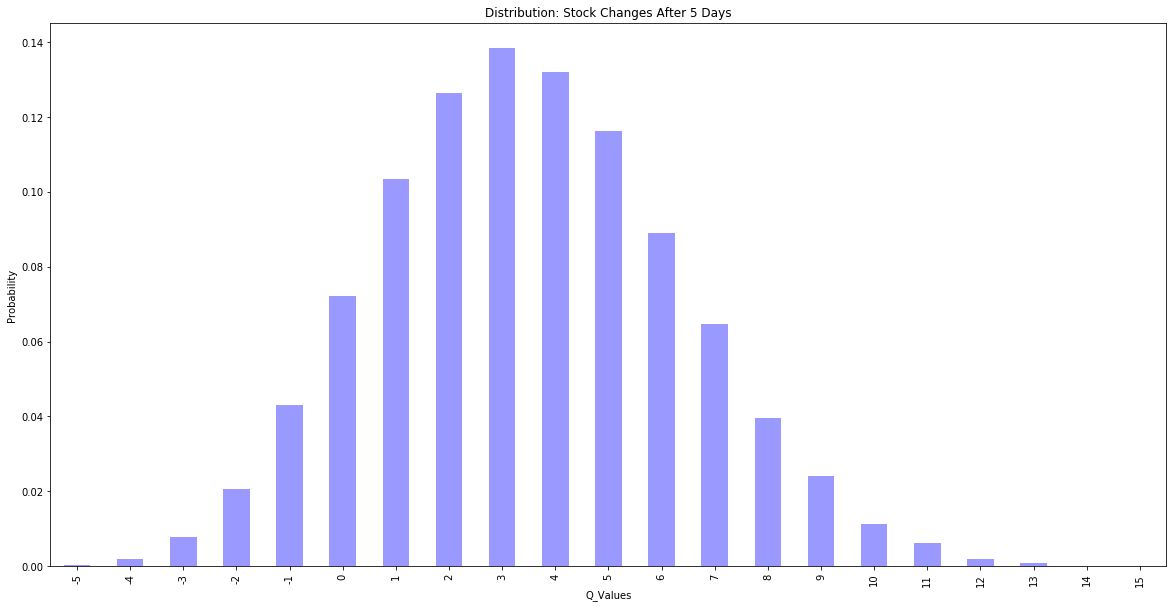

In [28]:
P = {
    "dis_V": [-1 , 0, 1, 2, 3],
    "dis_P": [0.2, 0.25, 0.35, 0.05, 0.15]
    }


plt.title("Distribution: Stock Changes After 2 Days")
plt.ylabel("Probability")
Q = NFoldConv(P,2)
Q.plot.bar(figsize=(20,10), color = 'red', alpha = 0.4)
plt.show()


plt.title("Distribution: Stock Changes After 5 Days")
plt.ylabel("Probability")
Q = NFoldConv(P,5)
Q.plot.bar(figsize=(20,10), color = 'blue', alpha = 0.4)
plt.show()

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 7NIS?

***Answer:***

In [29]:
#Converting the Series to DataFrame so its easier to work with
Q = NFoldConv(P,5)
Q_df = pd.DataFrame({'value':Q.index, 'prob':Q.values})

#Probability that stock gained more than 7
res = Q_df[Q_df['value'] > 7]['prob'].sum()
print("Probability That The Stock Gained Strictly More Than 7NIS: {0:.3f}".format(res))
#Probability that stock lost more than 7
res = Q_df[Q_df['value'] < 7]['prob'].sum()
print("Probability That The Stock Gained Strictly Less Than 7NIS: {0:.3f}".format(res))



Probability That The Stock Gained Strictly More Than 7NIS: 0.084
Probability That The Stock Gained Strictly Less Than 7NIS: 0.851


### Question 6 - Poisson mode

Let $X\sim{}Poi(λ)$<br>
#### 6.A
Find the mode of X and prove your calculation.

***Answer:***

Recall that the mode of a distibution is the most common value in the distribution.i.e, the value with the highest proability

For Poisson distribution and a random variable $X$, consider:
$$\frac{P(X = k)}{P(X = k-1)} = \frac{e^{-\lambda}\frac{\lambda^k}{k!}}{e^{-\lambda}\frac{\lambda^{k-1}}{(k-1)!}} = \frac{\lambda}{k}$$
Then,
$$P(X=k) = \frac{\lambda}{k} P(X= k-1)$$

Case 1: for $k <\lambda$

$\frac{\lambda}{k} > 1$ then for any $k$, $P(X=k) > P(X=k-1) > P(X=k-2)$..., this means that the mode of $X$ is monotononicly increaes until $k>=\lambda$

Case 2: for $k = \lambda$

$\frac{\lambda}{k} = 1$ then for any $k$, $P(X=k) = P(X=k-1) = P(X=k-2)$..., the mode is $x$ and $x-1$

Case 3: for $k > \lambda$

$\frac{\lambda}{k} < 1$ and $(x-1)!=\lambda$ then $P(X=k) < P(X=k-1) < P(X=k-2)$ for any $k$, then $\lambda$ is not an integer then the mode of $x = x-1 =  \lfloor \lambda \rfloor$

All together,
\begin{equation}
\\mode(X) =
\begin{cases} 
      \lambda - 1\,and\, \lambda & \text{if $\lambda$ is integer}, \\
      \lfloor\lambda\rfloor & \text{otherwise}
   \end{cases}
\end{equation}


#### 6.B
Plot the pdf of $X$ for $\lambda=4, \lambda=9.3, \lambda=25.8$.<br>
Show the following quantities on your plots:
* The mode of $X$
* The median of $X$
* $\mu(X)$

***Answer:***

NameError: name 'dataset' is not defined

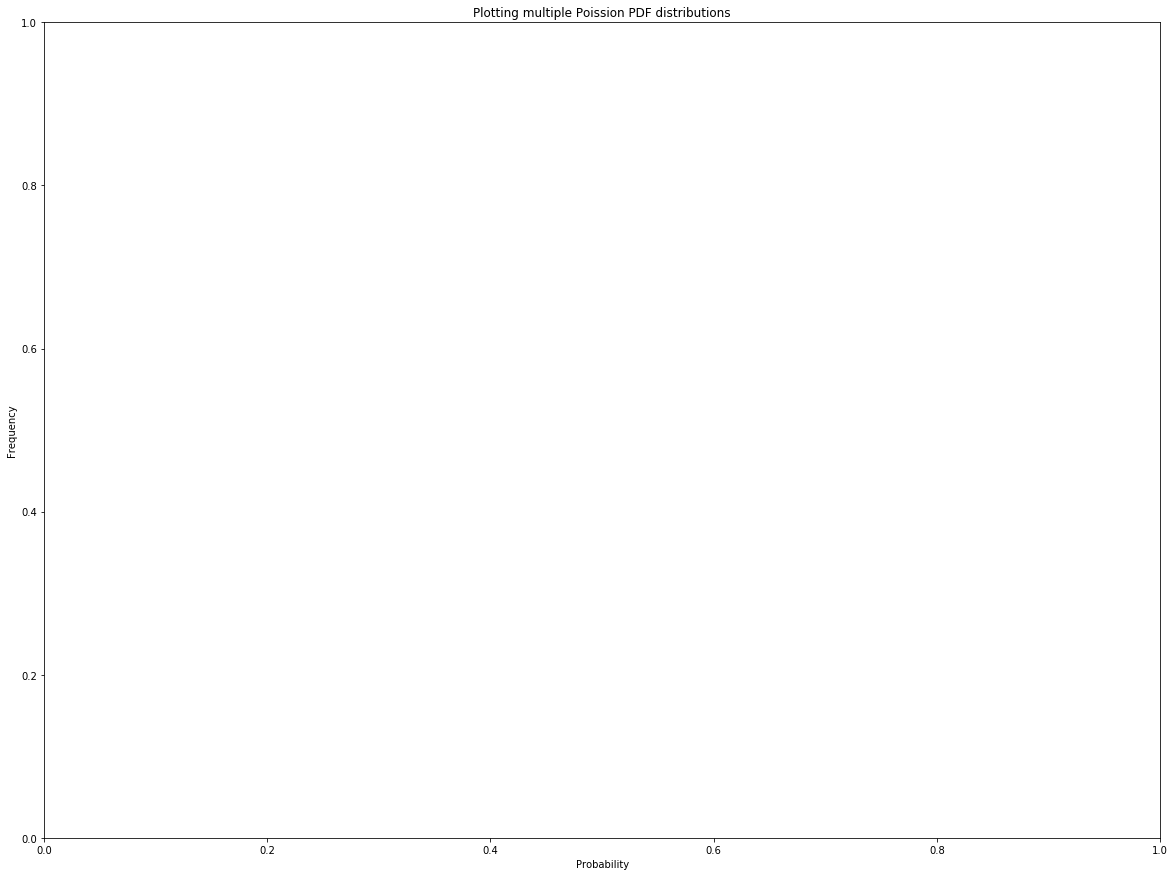

In [30]:
# Fixed randm values
np.random.seed(222)

# The array of lambdas
lambdaArr = [4, 9.3, 25.8]

# Setting up the figure
plt.figure(figsize=(20, 15))
plt.title('Plotting multiple Poission PDF distributions')
plt.xlabel('Probability')
plt.ylabel('Frequency') 

# Color list
colors = ['red', 'green', 'blue', 'maroon','lightgreen', 'slategrey', 'orchid','olivedrab','aqua','pink','greenyellow','deepskyblue']

# Fill up the array of datasets
for i,l in enumerate(lambdaArr):
    dataset[i] = np.random.poisson(lam=l, size=10000)

# For each dataset, find the mean, mode, median and construct the histogram and visual requirnments
for i in range(len(lambdaArr)):
    data_mean =np.average(dataset[i])
    data_mode = np.array(stats.mode(dataset[i]))[0][0]
    data_median = np.median(dataset[i])
    plt.text(10 * i, 2300, 'Mean:{0}\nMedian:{1}\nMode:{2}'.format(data_mean,data_median,data_mode),bbox=dict(facecolor=colors[i], alpha=0.1))
    plt.hist(dataset[i], bins = 15, label="PDF for λ = {}".format(lambdaArr[i]), color=colors[i],alpha = 0.5)
    plt.axvline(data_mean, color=colors[i+3], linestyle='--', linewidth=2, label='Mean λ={}'.format(lambdaArr[i]))
    plt.axvline(data_median, color=colors[i+6], linestyle='-', linewidth=2, label='Median λ={}'.format(lambdaArr[i]))
    plt.axvline(data_mode, color=colors[i+9], linestyle=':', linewidth=2, label='Mode λ={}'.format(lambdaArr[i]))

    
# Display the graph   
plt.legend()
plt.show()